Importing Libs

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
df=pd.read_csv('/content/Price_Agriculture_commodities_Week.csv (1).zip')
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0


In [123]:
df.isna().sum()

,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Arrival_Date,0
Min Price,0
Max Price,0
Modal Price,0


<ipython-input-124-772fc7413552>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Max Price', y='Arrival_Date', inner='box', palette='Dark2')


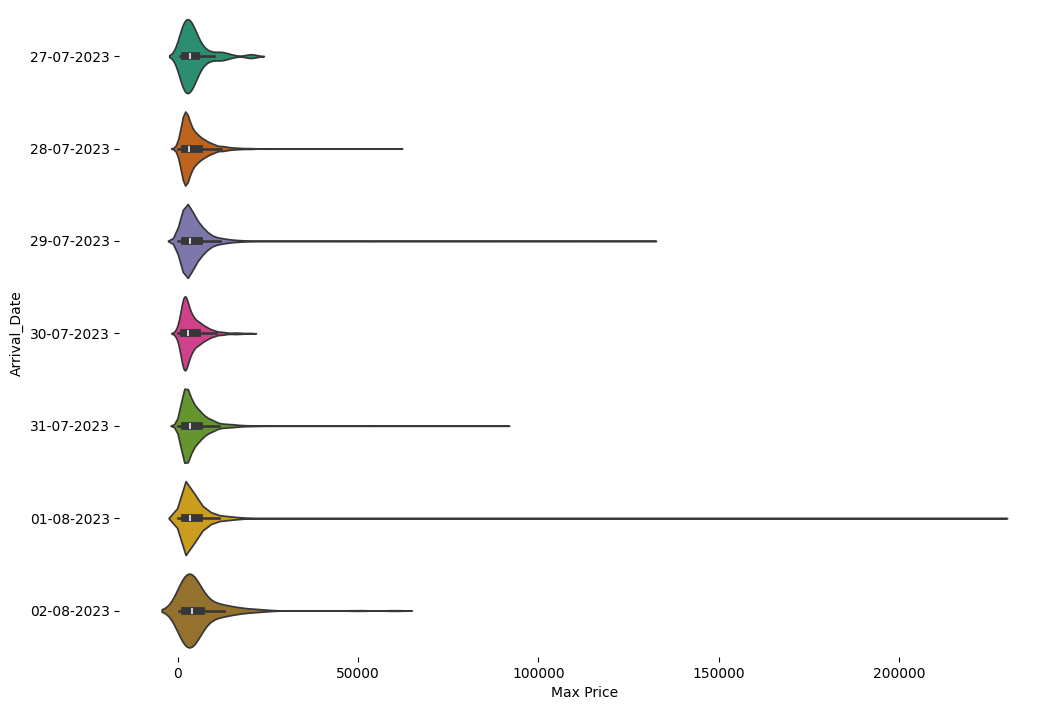

In [124]:
# @title Arrival_Date vs Max Price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Arrival_Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Max Price', y='Arrival_Date', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

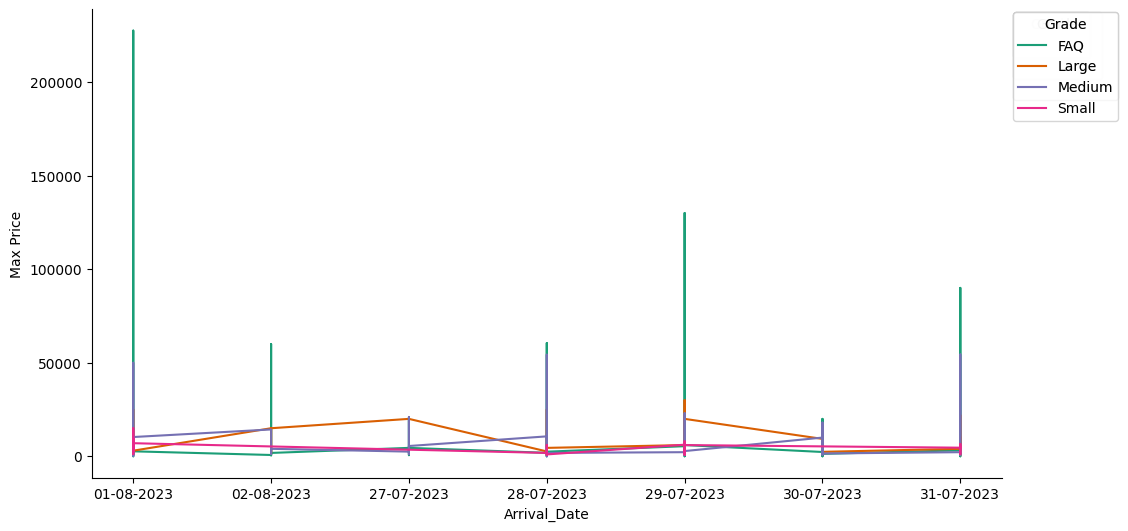

In [125]:
# @title Arrival_Date vs Max Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Arrival_Date']
  ys = series['Max Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Arrival_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Grade')):
  _plot_series(series, series_name, i)
  fig.legend(title='Grade', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Arrival_Date')
_ = plt.ylabel('Max Price')

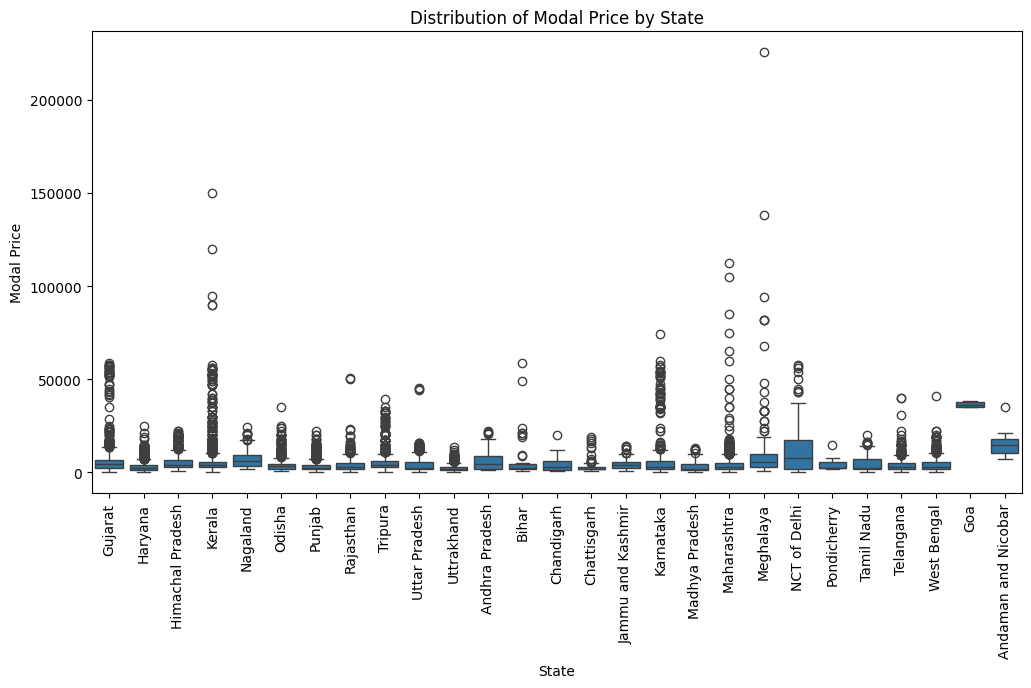

In [126]:
# @title Distribution of Modal Price by State

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Modal Price', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Modal Price by State')
plt.xlabel('State')
_ = plt.ylabel('Modal Price')

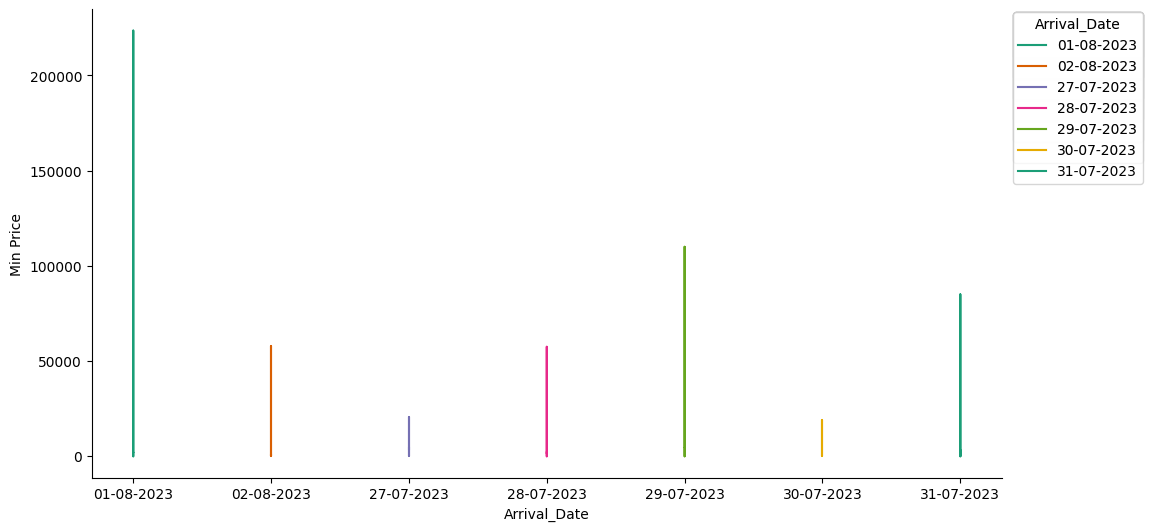

In [127]:
# @title Arrival_Date vs Min Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Arrival_Date']
  ys = series['Min Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Arrival_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Arrival_Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Arrival_Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Arrival_Date')
_ = plt.ylabel('Min Price')

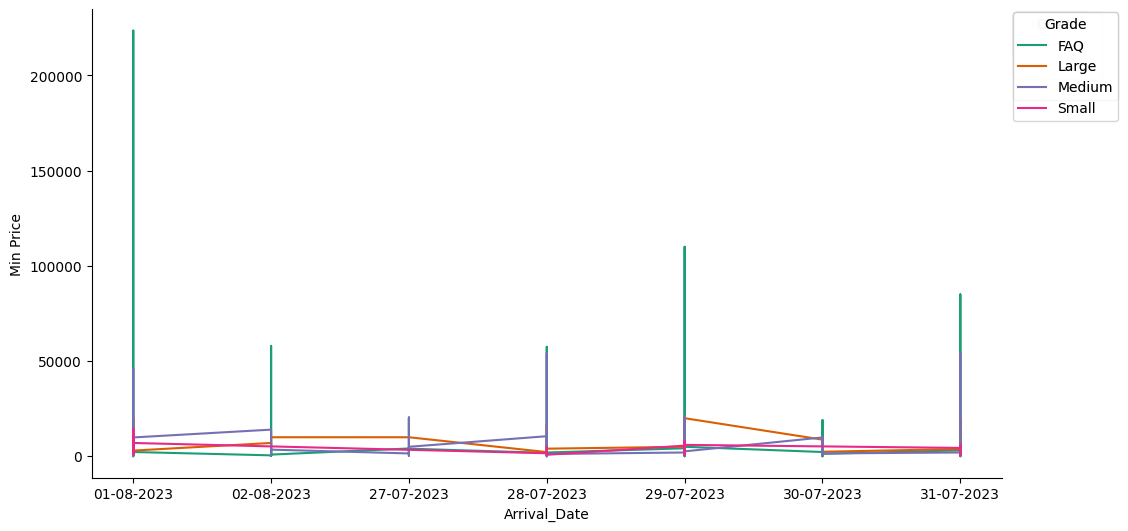

In [128]:
# @title Arrival_Date vs Min Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Arrival_Date']
  ys = series['Min Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Arrival_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Grade')):
  _plot_series(series, series_name, i)
  fig.legend(title='Grade', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Arrival_Date')
_ = plt.ylabel('Min Price')

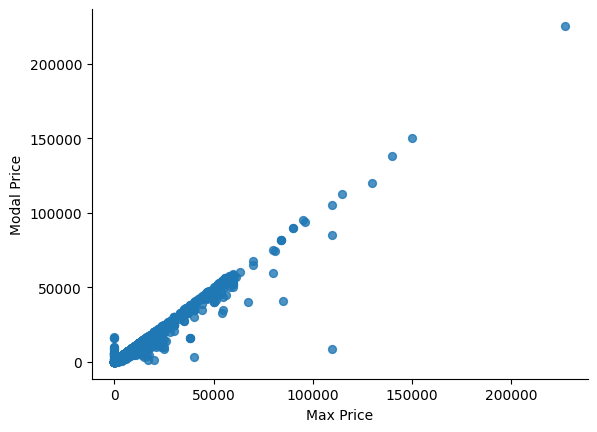

In [129]:
# @title Max Price vs Modal Price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Max Price', y='Modal Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

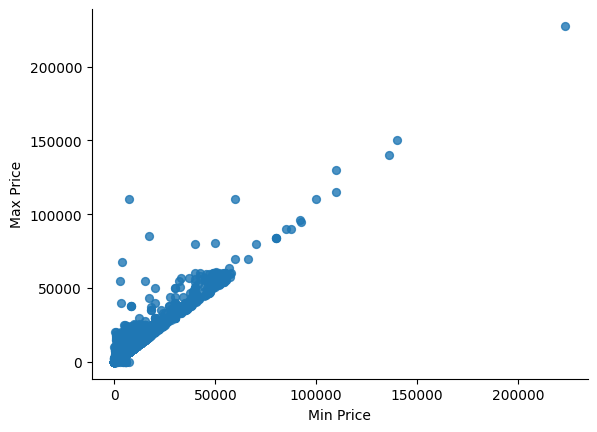

In [130]:
# @title Min Price vs Max Price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Min Price', y='Max Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

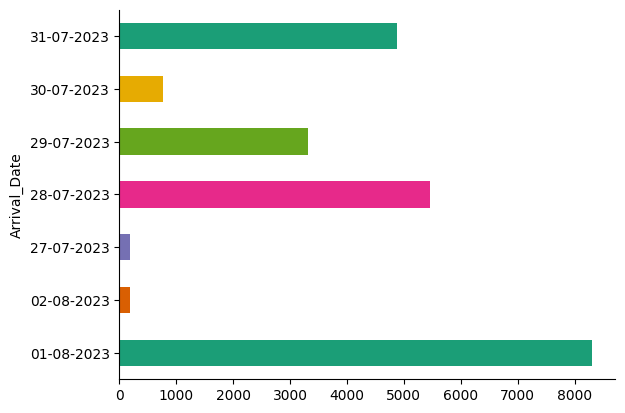

In [131]:
# @title Arrival_Date

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Arrival_Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

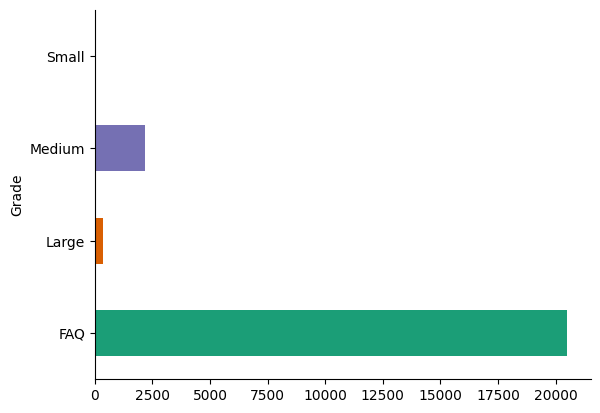

In [132]:
# @title Grade

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

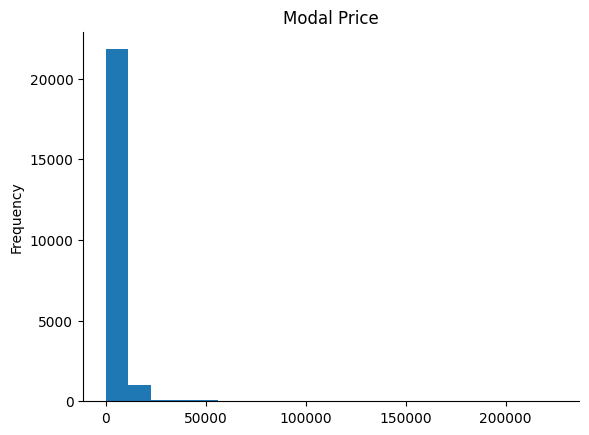

In [133]:
# @title Modal Price

from matplotlib import pyplot as plt
df['Modal Price'].plot(kind='hist', bins=20, title='Modal Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

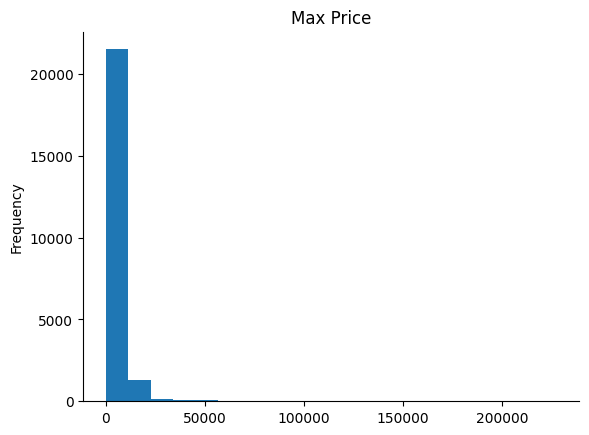

In [134]:
# @title Max Price

from matplotlib import pyplot as plt
df['Max Price'].plot(kind='hist', bins=20, title='Max Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

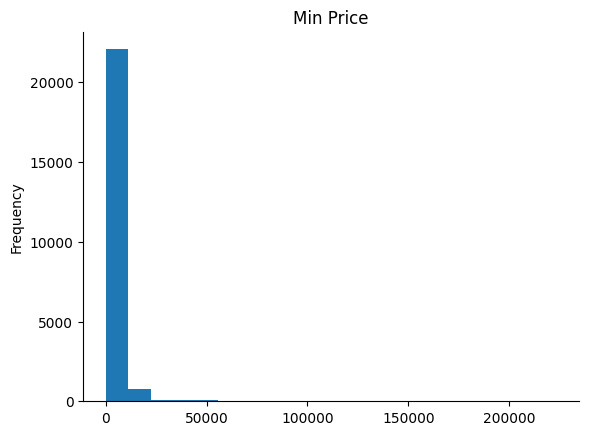

In [135]:
# @title Min Price

from matplotlib import pyplot as plt
df['Min Price'].plot(kind='hist', bins=20, title='Min Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [136]:
df.shape

(23093, 10)

In [137]:
df.describe()

,Min Price,Max Price,Modal Price
count,23093.000000,23093.000000,23093.000000
mean,4187.077045,4976.034260,4602.917742
std,5472.783385,6277.308057,5843.822711
min,0.000000,0.000000,0.830000
25%,1750.000000,2000.000000,1955.000000
50%,2725.000000,3400.000000,3000.000000
75%,5000.000000,6000.000000,5500.000000
max,223500.000000,227500.000000,225500.000000


In [138]:
df.describe(include='all')

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
count,23093,23093,23093,23093,23093,23093,23093,23093.000000,23093.000000,23093.000000
unique,27,403,1289,234,452,4,7,NaN,NaN,NaN
top,Uttar Pradesh,Pune,Pune,Potato,Other,FAQ,01-08-2023,NaN,NaN,NaN
freq,6298,588,195,1205,8909,20500,8304,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4187.077045,4976.034260,4602.917742
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5472.783385,6277.308057,5843.822711
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.830000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750.000000,2000.000000,1955.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2725.000000,3400.000000,3000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000,6000.000000,5500.000000


INFORMATION

In [139]:
class info():
    def __init__(self):
        self.df=df
    def info_(self):
        info__=df.info()
        return info__
    def is_null_sum(self):
        null_sum=df.isnull().sum()/100,("%")
        print("-----------------------------------")
        return null_sum
    def des_cribe(self):
        des=df.describe()
        print("-----------------------------------")
        return des
    def uni_que(self):
        uniquee=df.unique()
df1=info()
print(df1.info_())
print(df1.is_null_sum())
print(df1.des_cribe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB
None
-----------------------------------
(State           0.0
District        0.0
Market          0.0
Commodity       0.0
Variety         0.0
Grade           0.0
Arrival_Date    0.0
Min Price       0.0
Max Price       0.0
Modal Price     0.0
dtype: float64, '%')
-----------------------------------
           Min Price    

unique Values

In [140]:
for i in df.columns:
    print(i,"------------>",df[i].unique())

State ------------> ['Gujarat' 'Haryana' 'Himachal Pradesh' 'Kerala' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Tripura' 'Uttar Pradesh' 'Uttrakhand'
 'Andhra Pradesh' 'Bihar' 'Chandigarh' 'Chattisgarh' 'Jammu and Kashmir'
 'Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'NCT of Delhi'
 'Pondicherry' 'Tamil Nadu' 'Telangana' 'West Bengal' 'Goa'
 'Andaman and Nicobar']
District ------------> ['Amreli' 'Gurgaon' 'Kangra' 'Alappuzha' 'Kohima' 'Dhenkanal' 'Amritsar'
 'Chittorgarh' 'Rajasamand' 'North Tripura' 'Baghpat' 'Bulandshahar'
 'Hathras' 'Meerut' 'Dehradoon' 'Haridwar' 'Chittor' 'Cuddapah'
 'East Godavari' 'Guntur' 'Kurnool' 'Visakhapatnam' 'Kishanganj'
 'Chandigarh' 'Balodabazar' 'Bijapur' 'Bilaspur' 'Dhamtari' 'Kabirdham'
 'Kanker' 'Koria' 'Mungeli' 'Raigarh' 'Raipur' 'Rajnandgaon' 'Surajpur'
 'Banaskanth' 'Bharuch' 'Botad' 'Dahod' 'Gandhinagar' 'Jamnagar'
 'Junagarh' 'Mehsana' 'Morbi' 'Navsari' 'Patan' 'Porbandar' 'Rajkot'
 'Sabarkantha' 'Surat' 'Surendranagar' 'Vadodara(B

In [141]:
df[df['Grade'] == "FAQ"]

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0
...,...,...,...,...,...,...,...,...,...,...
23085,Uttrakhand,Haridwar,Roorkee,Bottle gourd,Other,FAQ,02-08-2023,600.0,1000.0,800.0
23086,Uttrakhand,Haridwar,Roorkee,Cucumbar(Kheera),Other,FAQ,02-08-2023,800.0,1200.0,1000.0
23087,Uttrakhand,Haridwar,Roorkee,Green Chilli,Other,FAQ,02-08-2023,2000.0,3000.0,2500.0
23091,Uttrakhand,Haridwar,Roorkee,Potato,Other,FAQ,02-08-2023,900.0,1800.0,1500.0


In [142]:
df.columns=df.columns.str.replace(" ",'_')

In [143]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0


Heatmap

Heatmap

<Axes: >

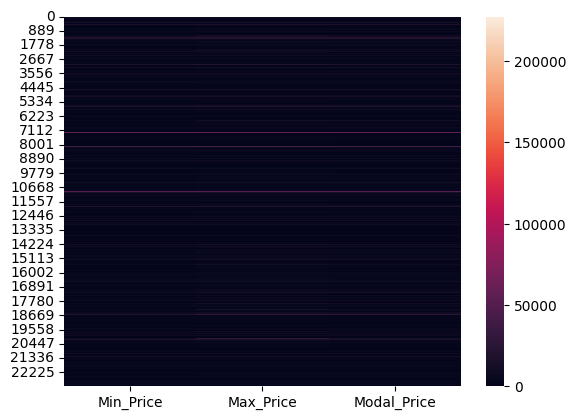

In [144]:
hist=df.select_dtypes(include=np.number)
sns.heatmap(data=hist)

BOX PLOT

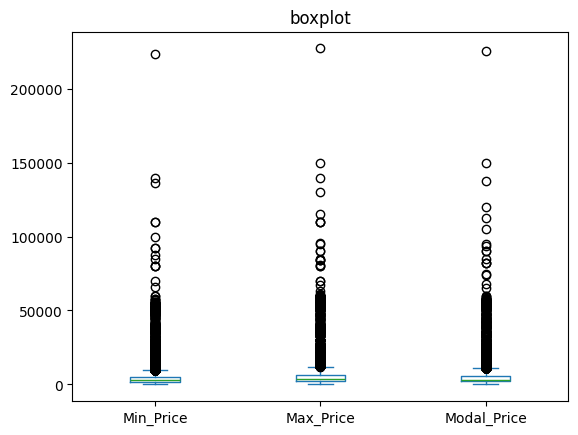

In [145]:
ax = df[['Min_Price', 'Max_Price', 'Modal_Price']].plot(kind='box', title='boxplot')

HISTPLOT

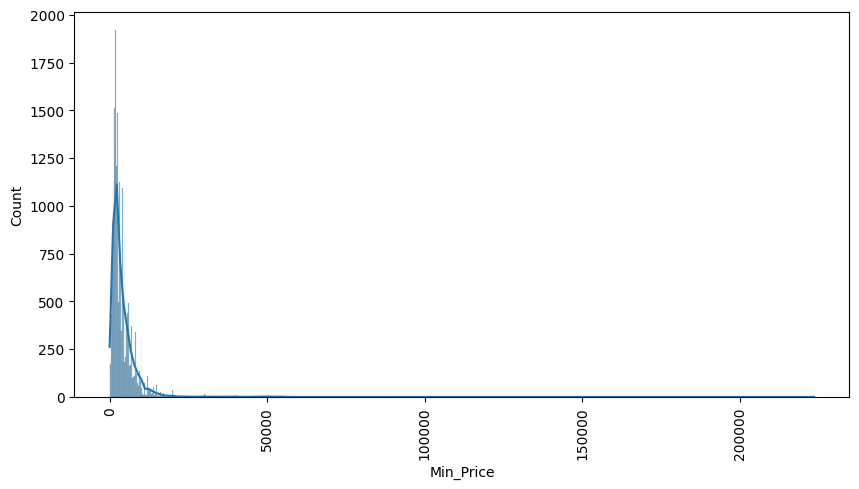

In [146]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Min_Price'],kde=True)
plt.xticks(rotation=90)
plt.show()

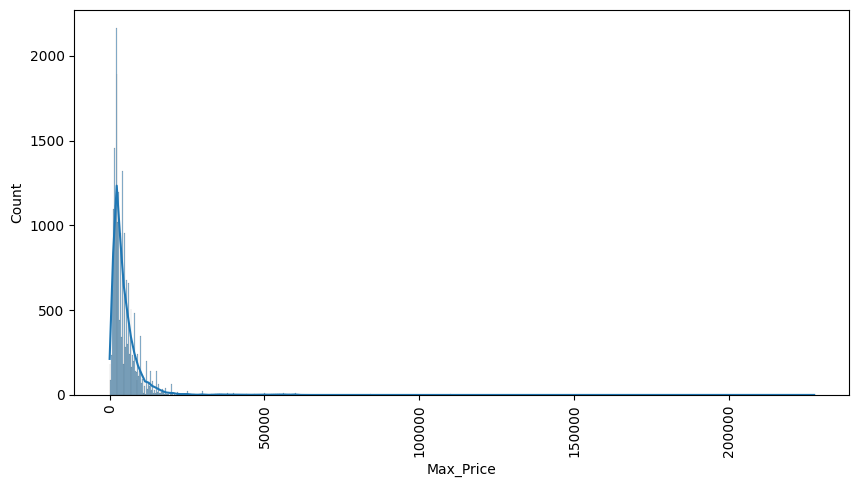

In [147]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Max_Price'],kde=True)
plt.xticks(rotation=90)
plt.show()

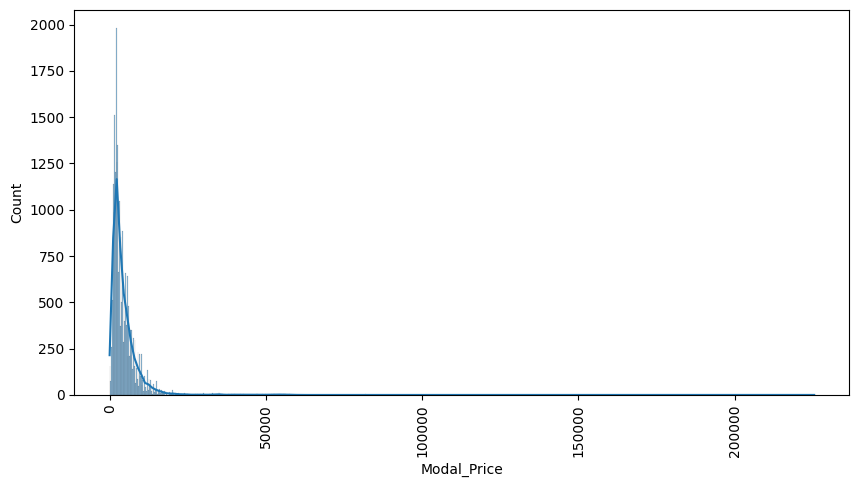

In [148]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Modal_Price'],kde=True)
plt.xticks(rotation=90)
plt.show()

In [149]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price'],
      dtype='object')

State_count

<Axes: xlabel='State', ylabel='count'>

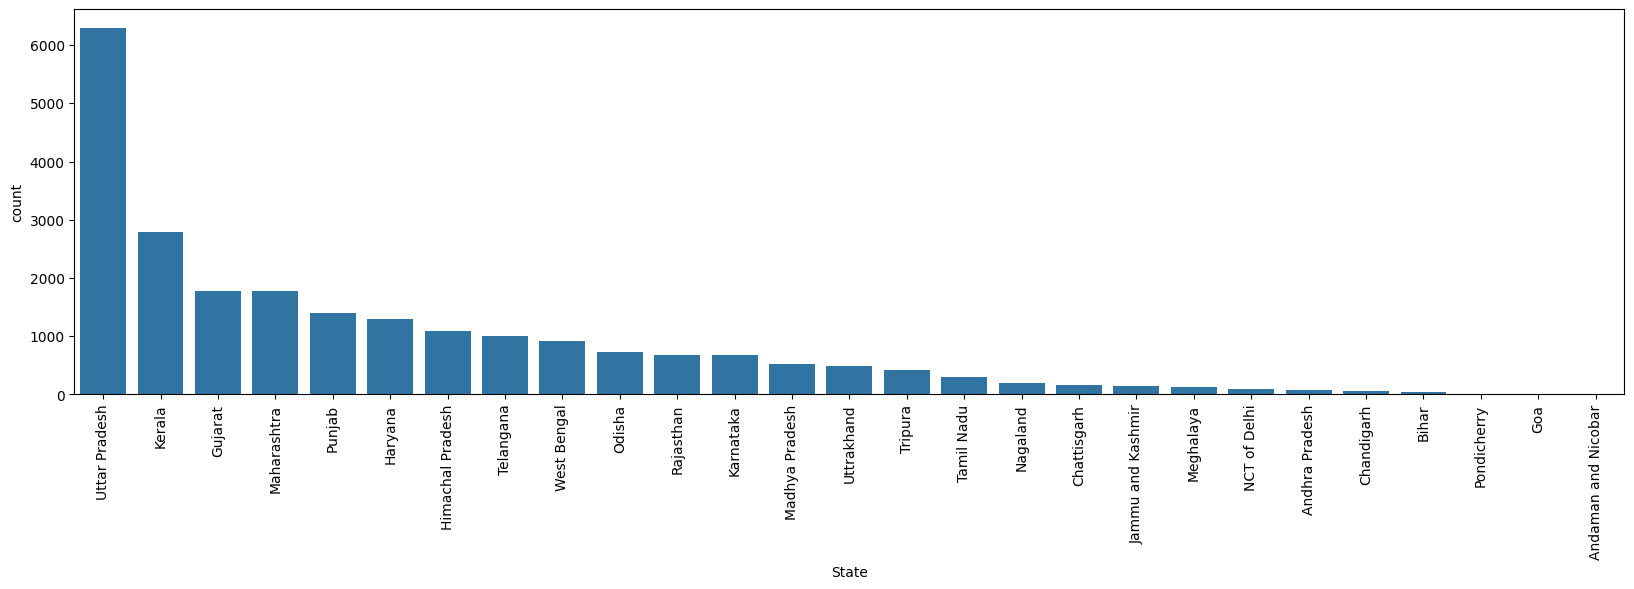

In [150]:
def count_plot_State(data=df):
    plt.figure(figsize=(20,5))
    plot=sns.countplot(x=df['State'],order=df.State.value_counts().index)
    plt.xticks(rotation=90)
    return plot
count_plot_State()

District_count

<Axes: xlabel='District', ylabel='count'>

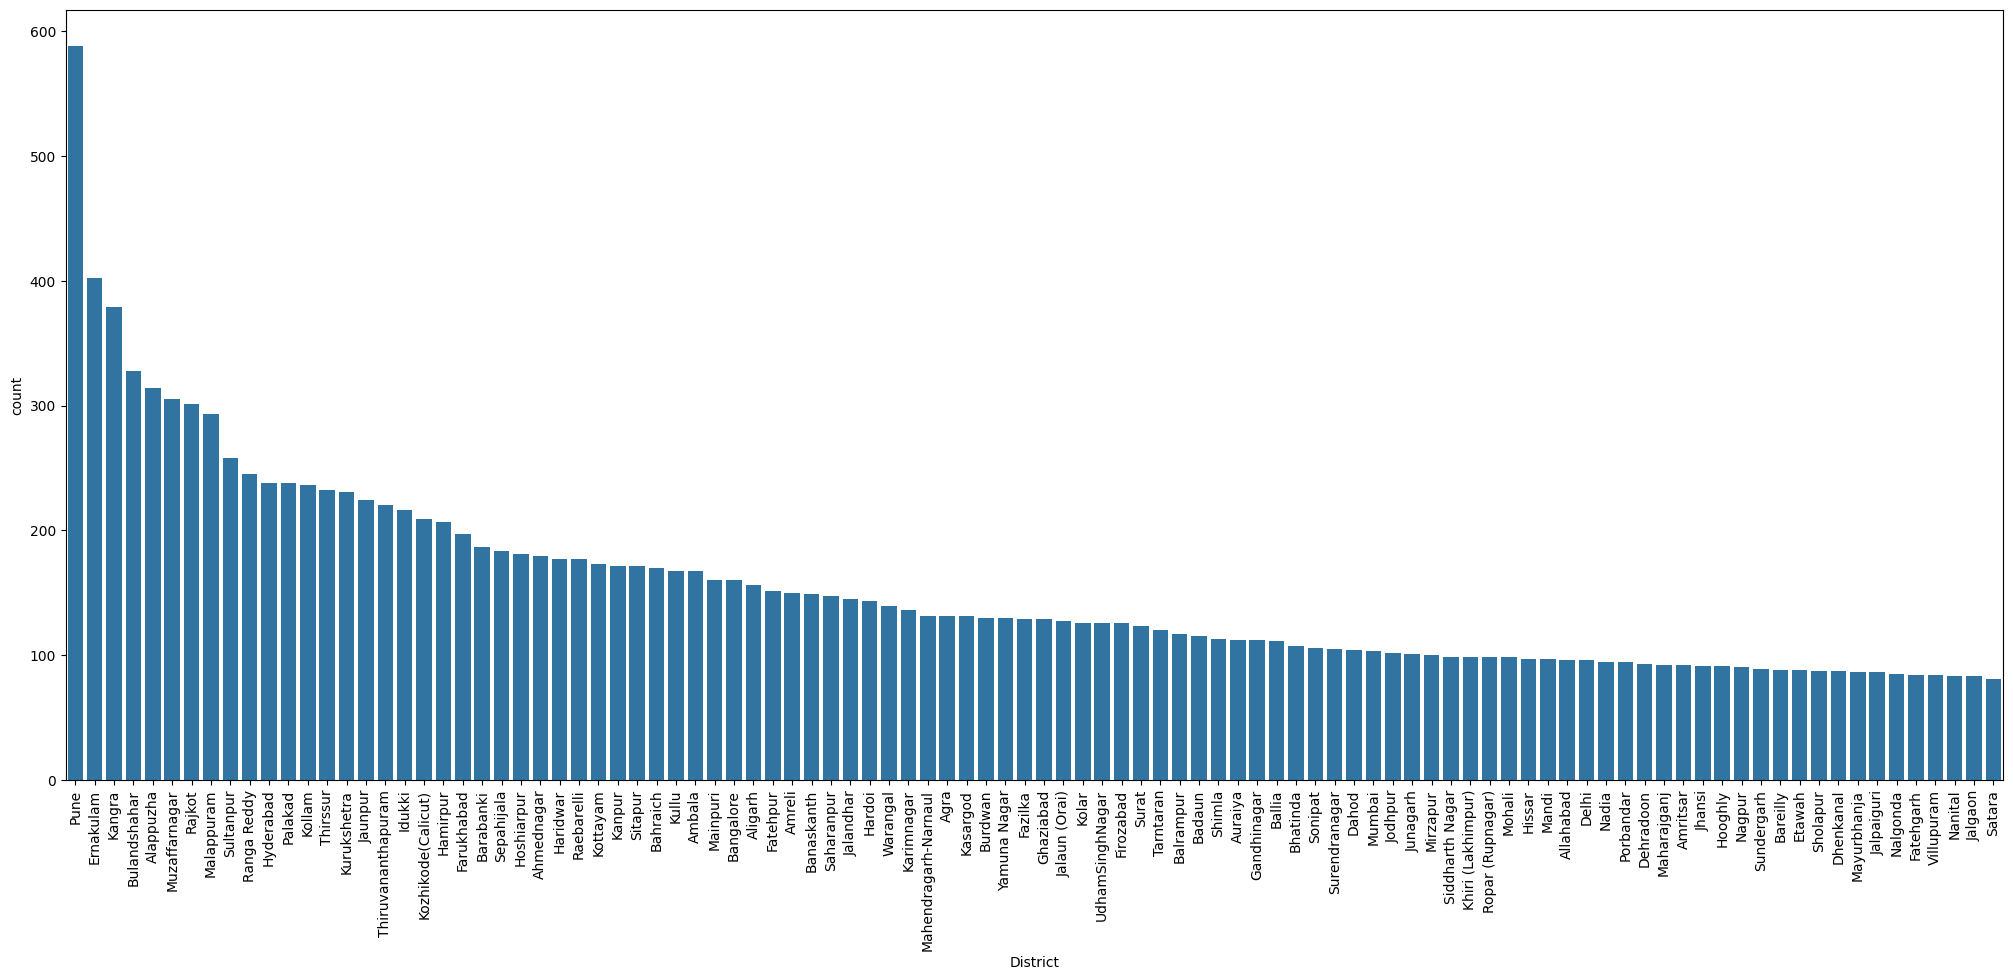

In [151]:
def count_plot_District(data=df):
    plt.figure(figsize=(25,10))
    plot=sns.countplot(x=df['District'],order=df.District.value_counts().iloc[:100].index)
    plt.xticks(rotation=90)
    return plot
count_plot_District()

Market_count

<Axes: xlabel='Market', ylabel='count'>

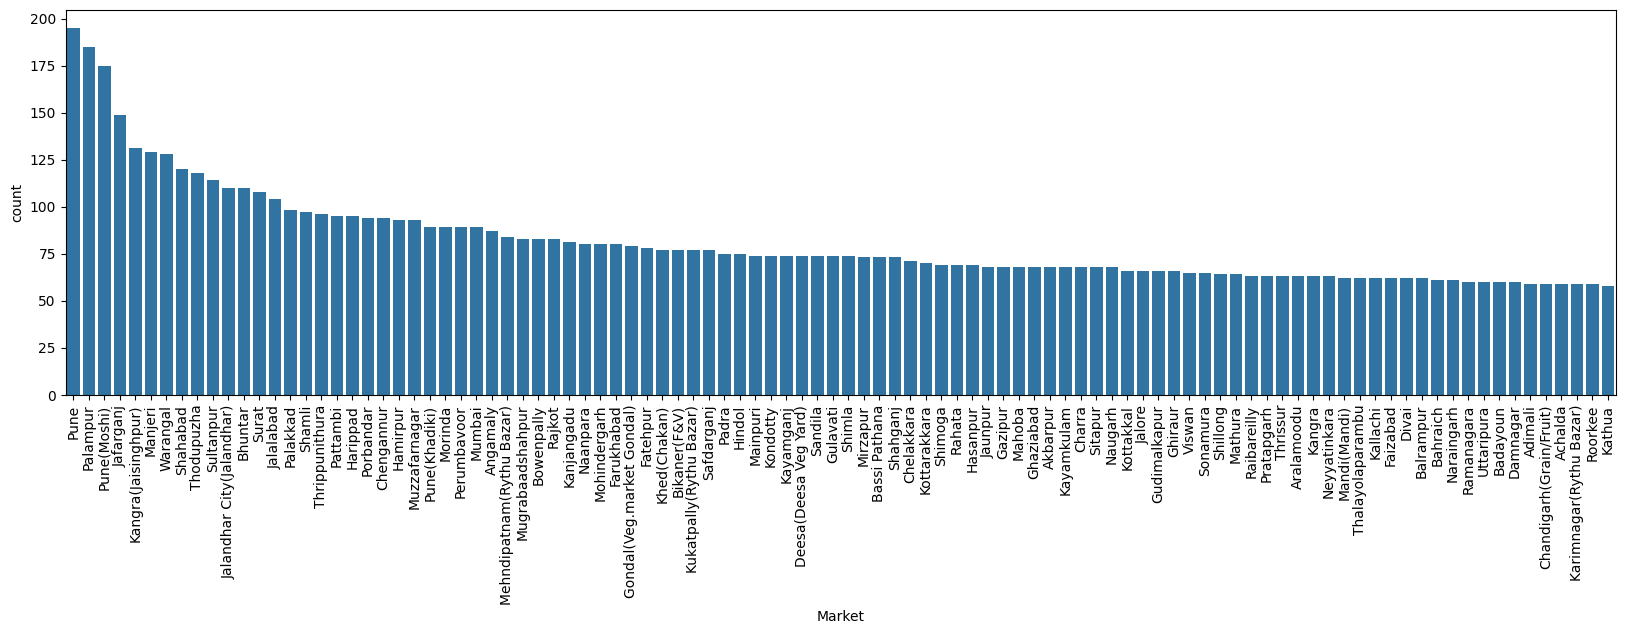

In [152]:
def count_plot_Market(data=df):
    plt.figure(figsize=(20,5))
    plot=sns.countplot(x=df['Market'],order=df.Market.value_counts().iloc[:100].index)
    plt.xticks(rotation=90)
    return plot
count_plot_Market()

Commodity_count

<Axes: xlabel='Commodity', ylabel='count'>

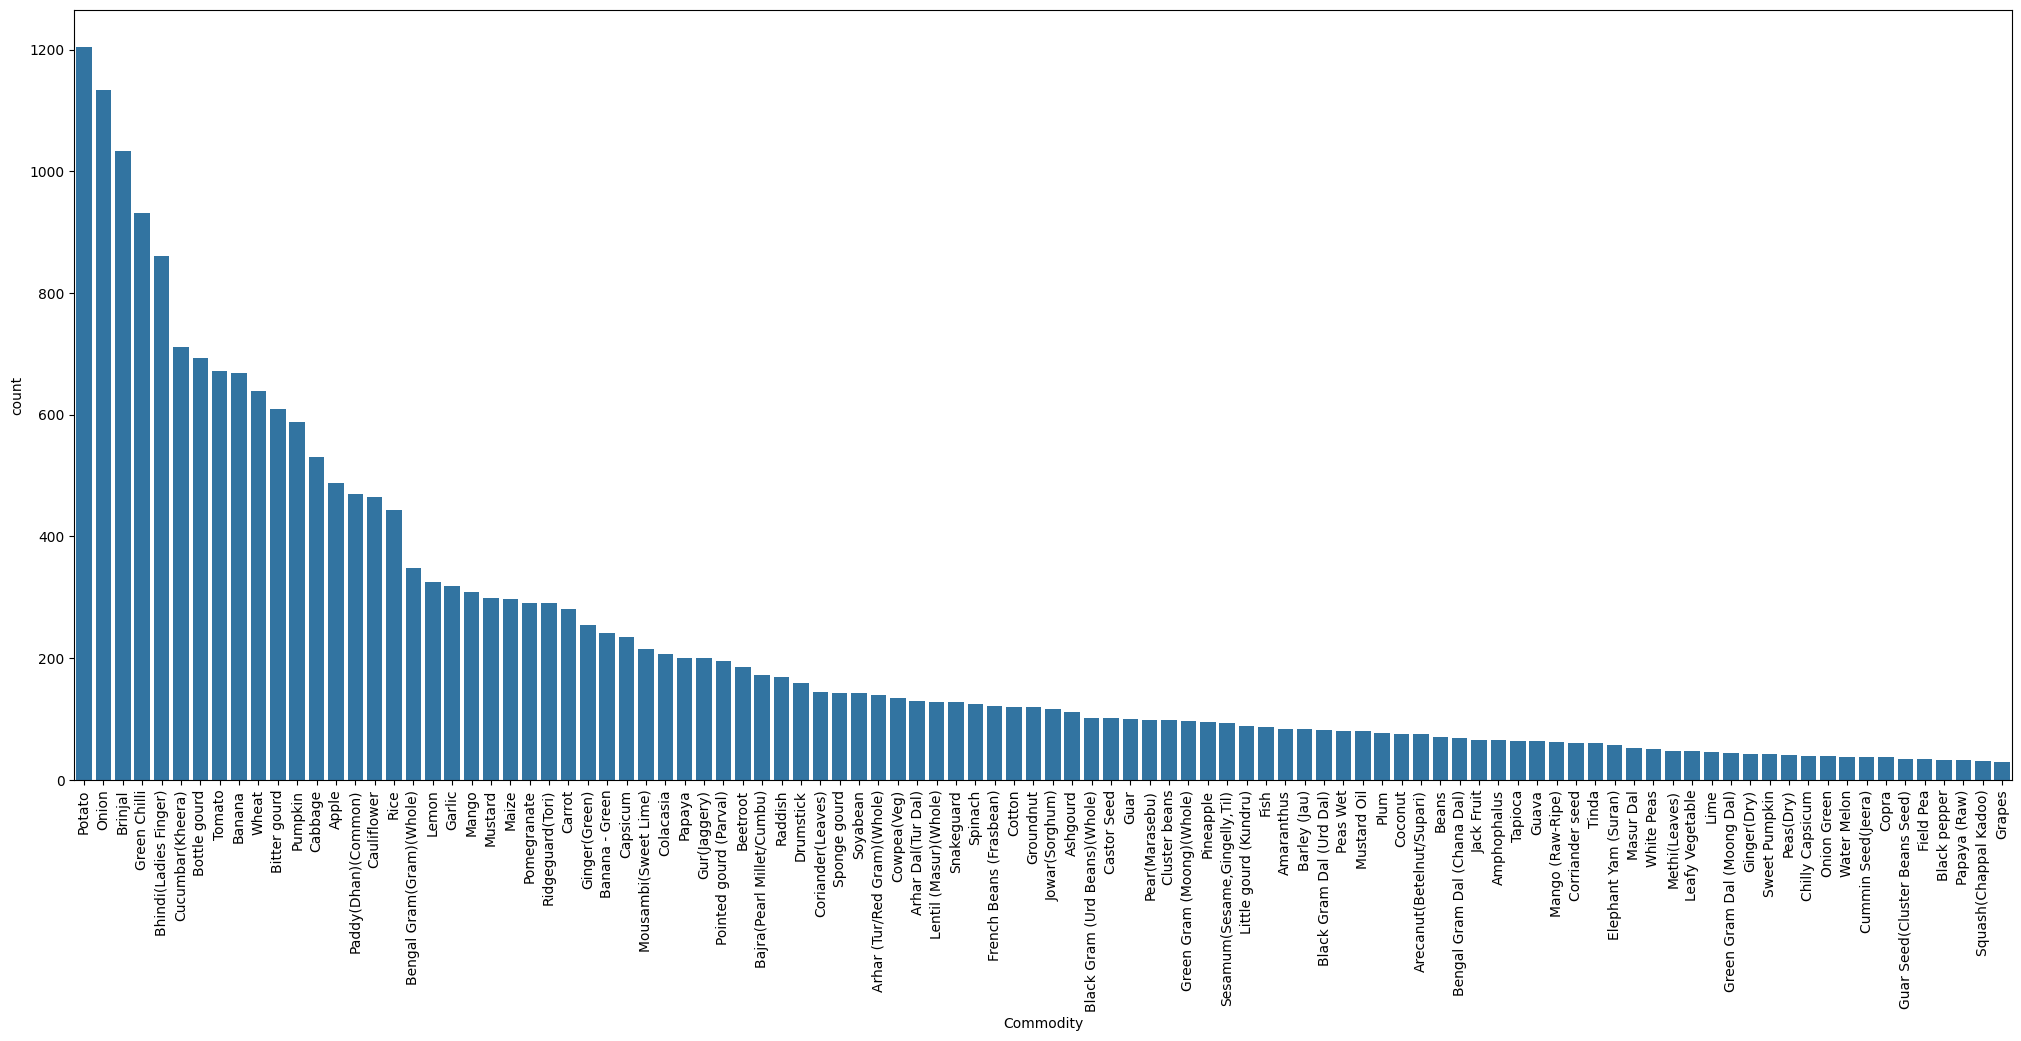

In [153]:
def count_plot_Commodity(data=df):
    plt.figure(figsize=(25,10))
    plot=sns.countplot(x=df['Commodity'],order=df.Commodity.value_counts().iloc[:100].index)
    plt.xticks(rotation=90)
    return plot
count_plot_Commodity()

Variety_count

<Axes: xlabel='Variety', ylabel='count'>

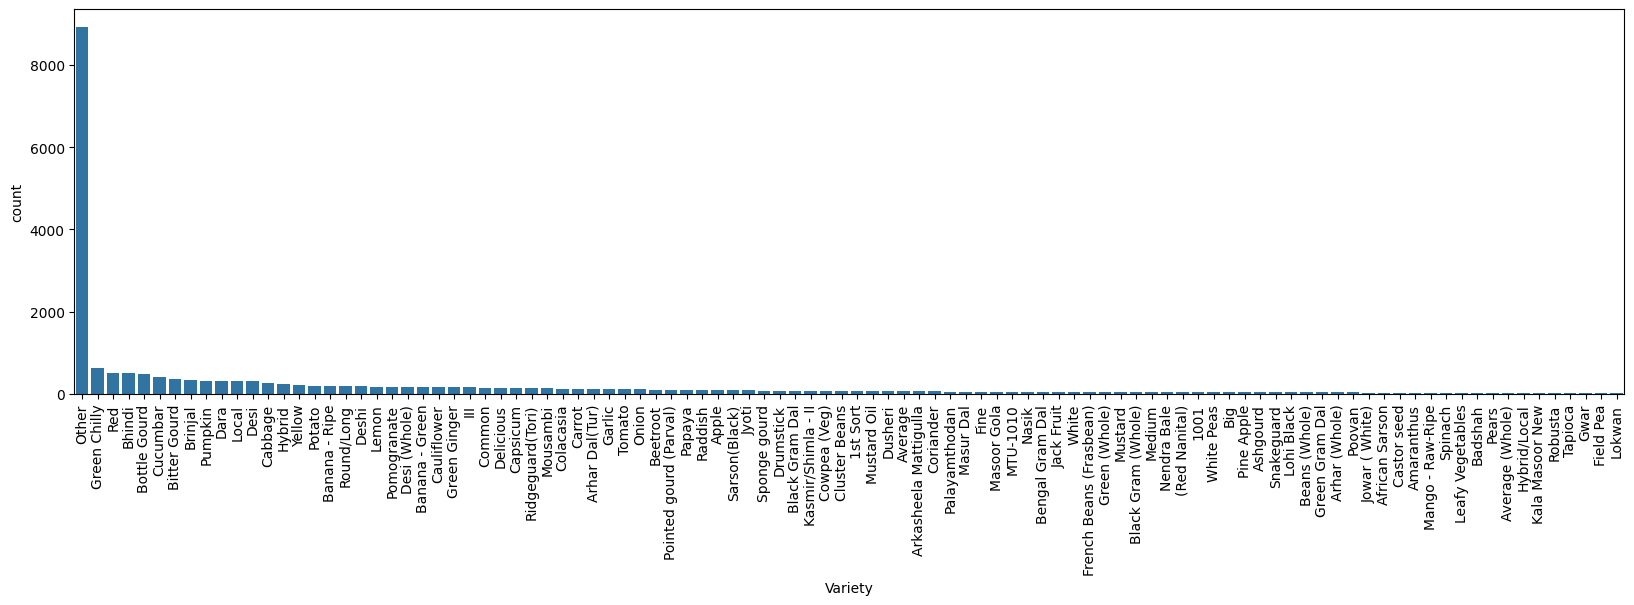

In [154]:
def count_plot_Variety(data=df):
    plt.figure(figsize=(20,5))
    plot=sns.countplot(x=df['Variety'],order=df.Variety.value_counts().iloc[:100].index,)
    plt.xticks(rotation=90)
    return plot
count_plot_Variety()

Grade_count_plot

<Axes: xlabel='Grade', ylabel='count'>

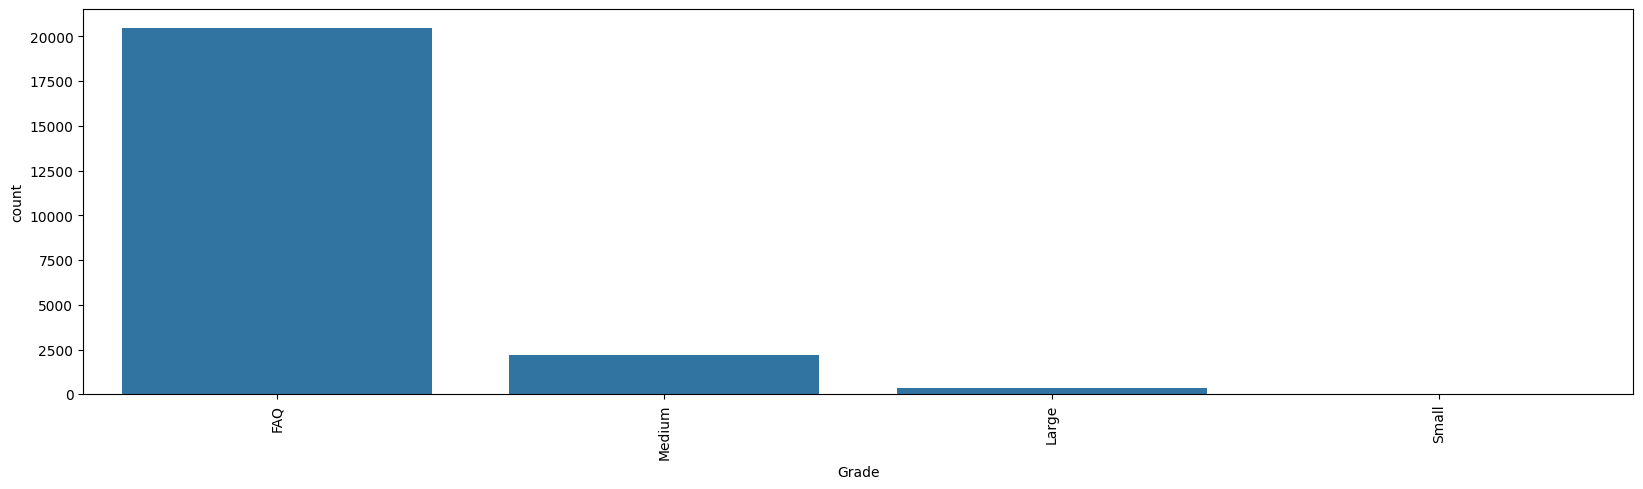

In [155]:
def count_plot_Grade(data=df):
    plt.figure(figsize=(20,5))
    plot=sns.countplot(x=df['Grade'],order=df.Grade.value_counts().index,)
    plt.xticks(rotation=90)
    return plot
count_plot_Grade()

In [156]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price'],
      dtype='object')

State_Max_Price

<Axes: xlabel='State', ylabel='Max_Price'>

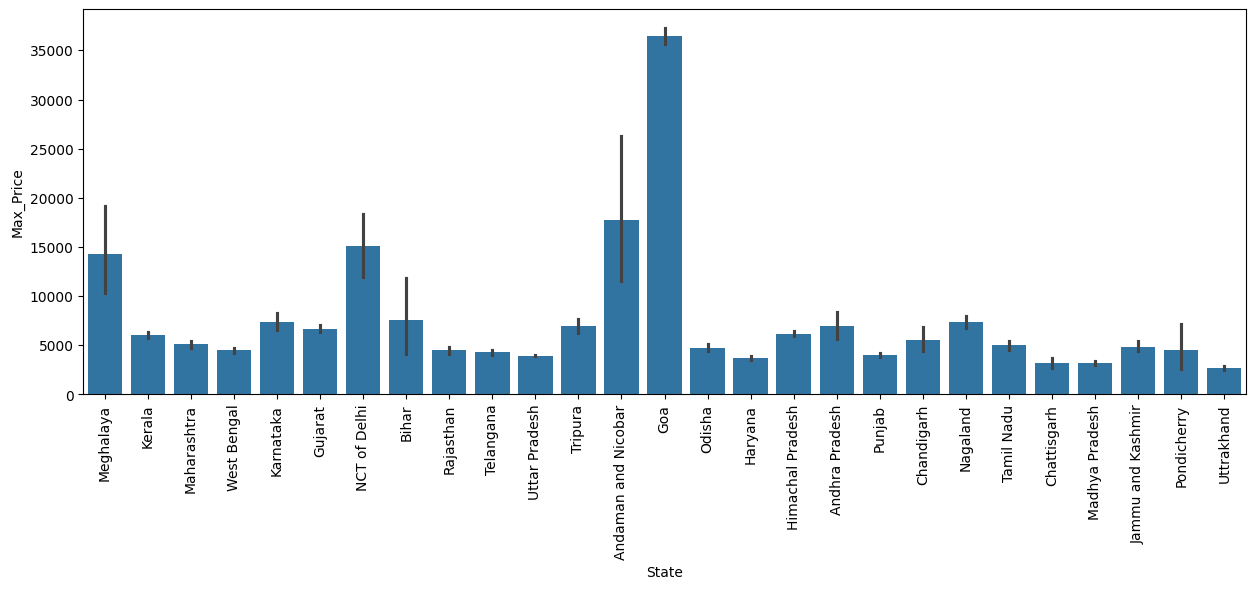

In [157]:
def cat_plot_State_max_price():
    plt.figure(figsize=(15,5))
    cat_plot_State_max_pricee=sns.barplot(x="State", y="Max_Price", data=df.sort_values('Max_Price',ascending=False))
    plt.xticks(rotation=90)
    return cat_plot_State_max_pricee
cat_plot_State_max_price()

District_Max_Price

<Axes: xlabel='District', ylabel='Max_Price'>

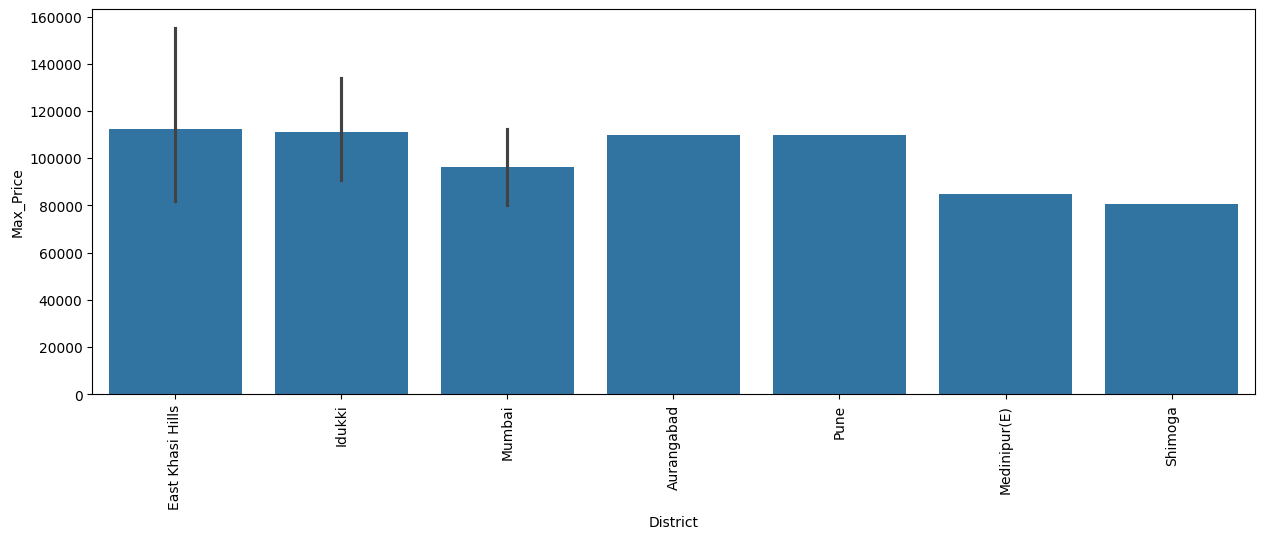

In [158]:
def cat_plot_District_max_price():
    plt.figure(figsize=(15,5))
    cat_plot_District_max_pricee=sns.barplot(x="District", y="Max_Price", data=df.sort_values('Max_Price',ascending=False).head(20))
    plt.xticks(rotation=90)
    return cat_plot_District_max_pricee
cat_plot_District_max_price()

Market_Max_Price

<Axes: xlabel='Market', ylabel='Max_Price'>

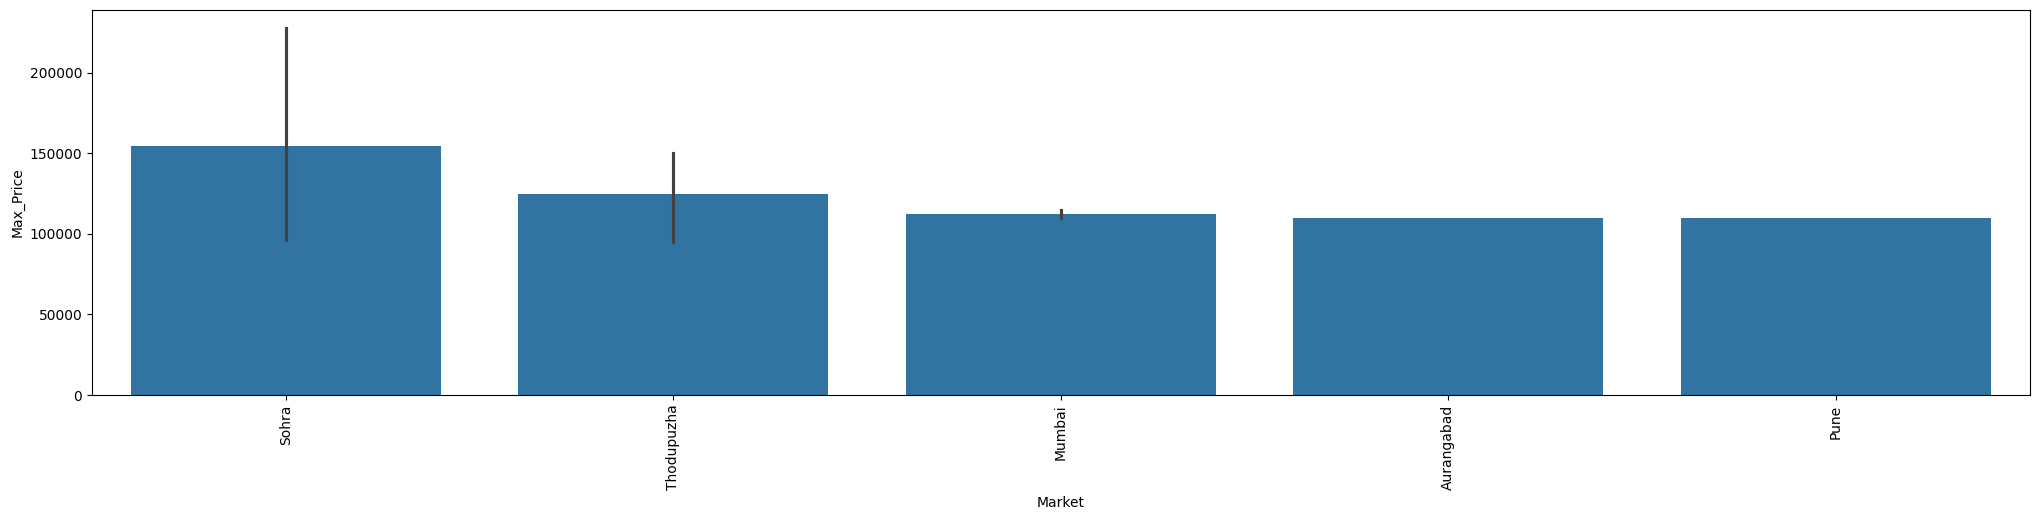

In [159]:
def cat_plot_Market():
    plt.figure(figsize=(25,5))
    cat_plot_Markett=sns.barplot(x="Market", y="Max_Price", data=df.sort_values('Max_Price',ascending=False).head(10))
    plt.xticks(rotation=90)
    return cat_plot_Markett
cat_plot_Market()

Commodity_max_price_plot

<Axes: xlabel='Commodity', ylabel='Max_Price'>

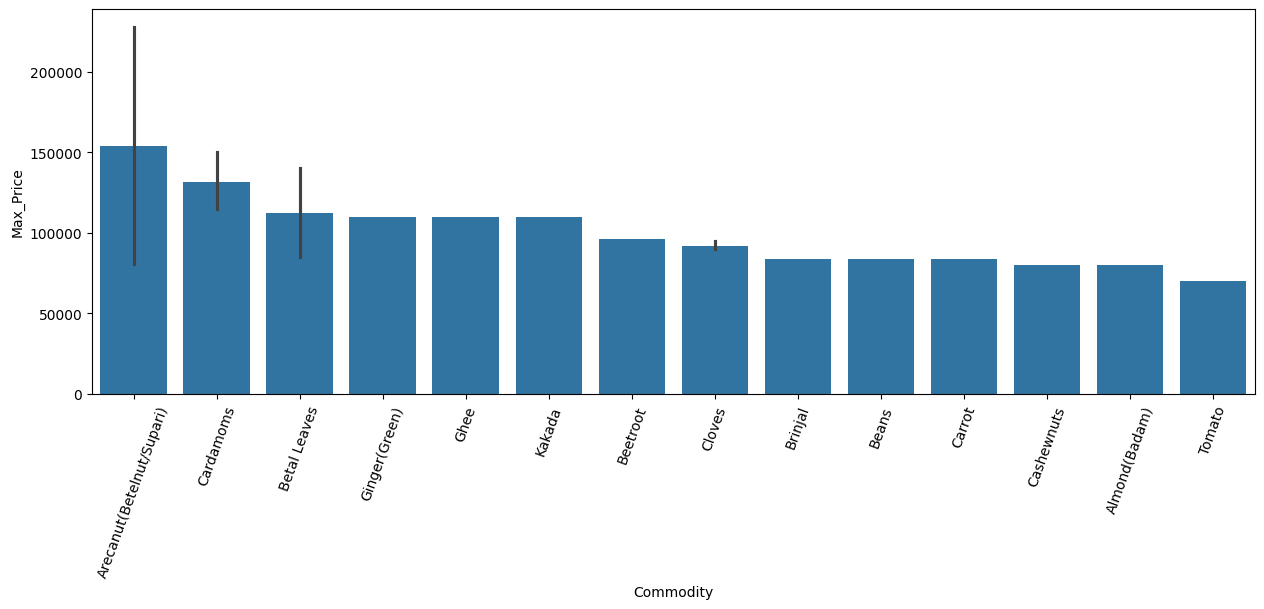

In [160]:
def cat_plot_Commodity():
    plt.figure(figsize=(15,5))
    cat_plot_Commodityy=sns.barplot(x="Commodity", y="Max_Price", data=df.sort_values('Max_Price',ascending=False).head(20))
    plt.xticks(rotation=70)
    return cat_plot_Commodityy
cat_plot_Commodity()

Variety_Max_Price_Plot

<Axes: xlabel='Variety', ylabel='Max_Price'>

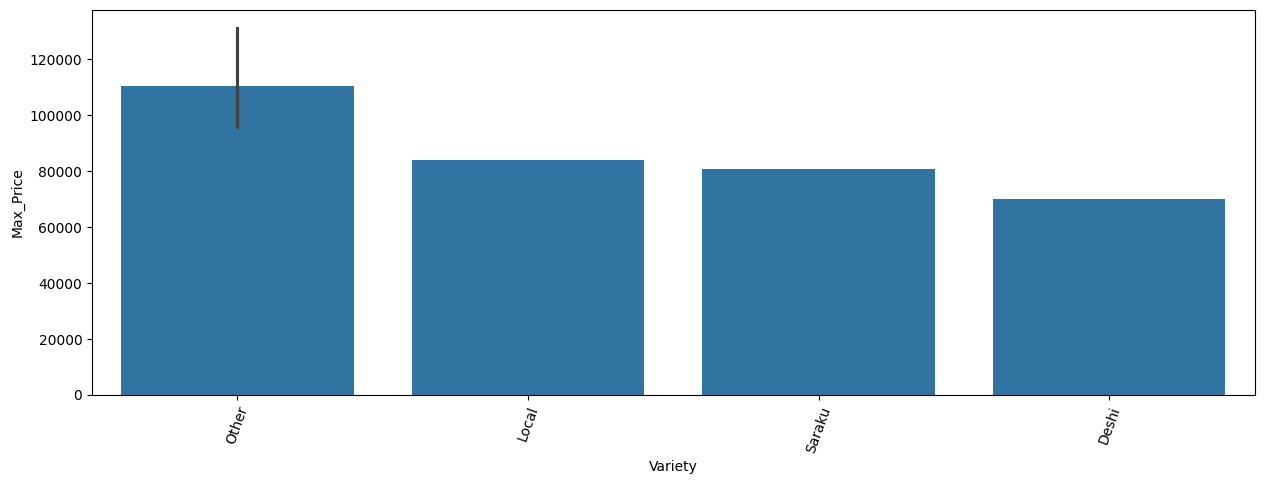

In [161]:
def cat_plot_Variety():
    plt.figure(figsize=(15,5))
    cat_plot_Varietyy=sns.barplot(x="Variety", y="Max_Price", data=df.sort_values('Max_Price',ascending=False).head(20))
    plt.xticks(rotation=70)
    return cat_plot_Varietyy
cat_plot_Variety()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min_Price     23093 non-null  float64
 8   Max_Price     23093 non-null  float64
 9   Modal_Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


Mapping df['Grade]
 &
 splitting the data

In [163]:
grade_mapping = {'low': 1, 'medium': 2, 'high': 3, 'FAQ' : 4}
df['Grade'] = df['Grade'].map(grade_mapping)


X=df.drop(['Modal_Price', 'Grade'], axis=1)
y=df['Modal_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
X_train.head()

,State,District,Market,Commodity,Variety,Arrival_Date,Min_Price,Max_Price
4015,Uttar Pradesh,Bulandshahar,Siyana,Potato,Desi,28-07-2023,1121.0,1300.0
4453,Uttar Pradesh,Jaunpur,Shahganj,Brinjal,Brinjal,28-07-2023,2100.0,2300.0
20505,Uttar Pradesh,Bahraich,Naanpara,Apple,Royal Delicious,01-08-2023,10200.0,10300.0
19570,Rajasthan,Jodhpur,Jodhpur(F&V)(Bhadwasia),Potato,Other,01-08-2023,500.0,1300.0
13822,Uttar Pradesh,Jhansi,Baruwasagar,Colacasia,Colacasia,31-07-2023,1800.0,2200.0


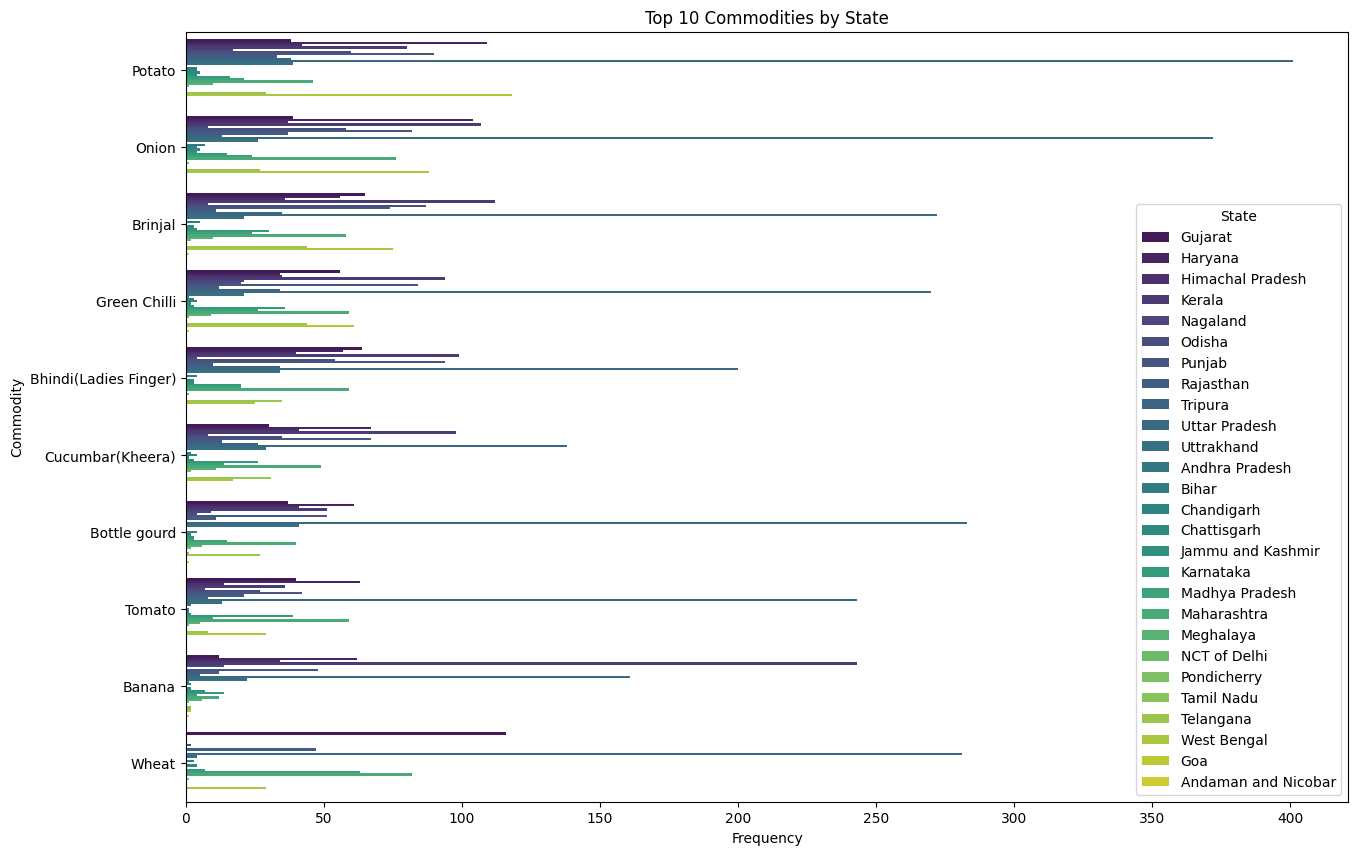

In [165]:
# @title Top 10 Commodities by State

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.countplot(y='Commodity', hue='State', data=df, order=df['Commodity'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Commodities by State')
plt.xlabel('Frequency')
_ = plt.ylabel('Commodity')

In [166]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Identify categorical and numerical features
categorical_features = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Arrival_Date']
numerical_features = ['Min_Price', 'Max_Price']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to your data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Transforming Data

Linear Model

In [167]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

Decision Tree Regressor

In [168]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

Forest Model

In [169]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)

Gradient Boost Regressor

In [170]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

Support Vector

In [171]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

Printing R-Squared

In [172]:
print('Linear Regression - R-squared:', linear_r2)
print('Decision Tree Regression - R-squared:', tree_r2)
print('Random Forest Regression - R-squared:', forest_r2)
print('Gradient Boosting Regression - R-squared:', gb_r2)
print('Support Vector Regression (SVR) - R-squared:', svr_r2)

Linear Regression - R-squared: -3963037367.698308
Decision Tree Regression - R-squared: 0.9886268450985589
Random Forest Regression - R-squared: 0.9915810196874206
Gradient Boosting Regression - R-squared: 0.9952740110603374
Support Vector Regression (SVR) - R-squared: 0.2578526971073932


Plotting R2

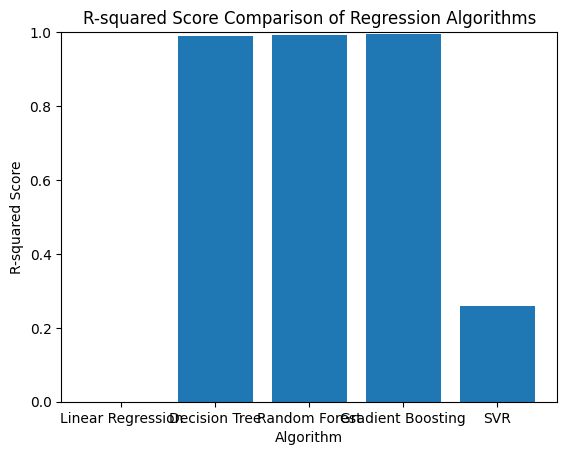

In [173]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
r2_scores = [linear_r2, tree_r2, forest_r2, gb_r2, svr_r2]

plt.bar(models, r2_scores)
plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison of Regression Algorithms')
plt.ylim([0, 1])
plt.show()

In [177]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Min_Price', 'Max_Price']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['State', 'District', 'Market', 'Commodity',
                                  'Variety', 'Arrival_Date'])])

In [178]:
# prompt: downloads model

import joblib

# Assuming 'forest_model' is your trained RandomForestRegressor
# Replace 'your_model_filename.pkl' with the desired filename
joblib.dump(forest_model, 'forest_model.pkl')

joblib.dump(preprocessor, 'preprocessor.pkl')



['preprocessor.pkl']